### Step 1: Prepare a csv file using excel (note: formatting works better with old excel version)

#### 1a Import data from csv - pandas

In [2]:
import os
import pandas as pd

In [3]:
#import from csv
in_csv = r"E:\HIPP\11_Deliverables\03_Bathymetry\05_SoundVelocityProfiles\SVP_Raw\SI1001_SVP_RAW.csv"
df = pd.read_csv(in_csv)
print(df.columns)
# print(len(df))
list(df.iloc[[0,50,100,-1]])

Index(['OID_', 'Index', 'Date', 'UTC', 'SVP_file', 'SVP_URL', 'SVP_Source',
       'E_UTM56S', 'N_UTM56S', 'Zone', 'Lat', 'Lon', 'Depth', 'Comment',
       'Enter_prof'],
      dtype='object')


['OID_',
 'Index',
 'Date',
 'UTC',
 'SVP_file',
 'SVP_URL',
 'SVP_Source',
 'E_UTM56S',
 'N_UTM56S',
 'Zone',
 'Lat',
 'Lon',
 'Depth',
 'Comment',
 'Enter_prof']

#### 1b. Check and tidy data - pandas

In [4]:
#add FID: not neccessary if generating shp file using ESRI tool
# df['FID'] = [i for i in range(len(df))] #auto add FID col
df.iloc[[0,50,100,-1]]
#change col names
# column_names={}
# df = df.rename(columns=column_names) #rename
df = df.rename(columns=str.lower,inplace=False) #renametolowercase
df[1:-1:50]
#get column names and sort by alphabet
new_col_names = list(df.columns)
# print(new_col_names)
# new_col_names.sort()
# new_col_names
#change to the order we want manually
# new_col_names = ['fid','sample_id', 'date_utc', 'time_utc', 'lat', 'lon', 'depth', 
#                'method', 'recovery', 'weight', 'name', 'composition', 
#                'class', 'hue_card', 'hue_value', 'file_name', 'sample_held', 
#                'obs_sig', 'anoxic_sediments', 'comments', 'sample', 'url', 
#                'e_utm56s', 'n_utm56s']
# new_col_names
#re_oder the dataframe
# df = df[new_col_names]
df.iloc[[0,50,100,-1]]

,oid_,index,date,utc,svp_file,svp_url,svp_source,e_utm56s,n_utm56s,zone,lat,lon,depth,comment,enter_prof
0,0,SVP002,9/12/2020 0:00:00,06:04,20201209_0555_SVP,11_Deliverables\03_Bathymetry\05_SoundVelocity...,MiniSVP SN67443,392825.73,6341170.80,56S,33;03.76495S,151;51.11618E,127,Use Valeport to export .asvp,ES
50,50,SVP052,24/12/2020 0:00:00,14:13,20201224_1400_SVP,11_Deliverables\03_Bathymetry\05_SoundVelocity...,MiniSVP SN67443,408798.26,6353815.91,56S,32;57.00959S,152;01.45615E,112,Block 02,NS
100,100,SVP102,12/01/2021 0:00:00,04:00,20210112_0400_SVP,11_Deliverables\03_Bathymetry\05_SoundVelocity...,MiniSVP SN67443,385687.05,6348396.33,56S,32.996860115 S,151.776381520 E,35,Block 01,BT
101,101,SVP103,12/01/2021 0:00:00,18:23,20210112_1830_SVP,11_Deliverables\03_Bathymetry\05_SoundVelocity...,MiniSVP SN67443,394255.10,6340262.99,56S,33.071076275 S,151.867140396 E,108,Block 01,NS


In [5]:
df.columns

Index(['oid_', 'index', 'date', 'utc', 'svp_file', 'svp_url', 'svp_source',
       'e_utm56s', 'n_utm56s', 'zone', 'lat', 'lon', 'depth', 'comment',
       'enter_prof'],
      dtype='object')

In [6]:
df['svp_url'][0]

'11_Deliverables\\03_Bathymetry\\05_SoundVelocityProfiles\\SVP_Raw\\asvp\\20201209_0555_SVP'

In [7]:
#generate path for url column
url_list = []
for file_n in df['svp_file']:
    msg = "11_FinalDeliverables\\03_Bathymetry\\05_SoundVelocityProfiles\\SVP_Raw\\asvp\\"+file_n
#     print(msg)
    url_list.append(msg)
#change svp url
df['svp_url'] = url_list
df.iloc[[0,50,100,-1]]

,oid_,index,date,utc,svp_file,svp_url,svp_source,e_utm56s,n_utm56s,zone,lat,lon,depth,comment,enter_prof
0,0,SVP002,9/12/2020 0:00:00,06:04,20201209_0555_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,392825.73,6341170.80,56S,33;03.76495S,151;51.11618E,127,Use Valeport to export .asvp,ES
50,50,SVP052,24/12/2020 0:00:00,14:13,20201224_1400_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,408798.26,6353815.91,56S,32;57.00959S,152;01.45615E,112,Block 02,NS
100,100,SVP102,12/01/2021 0:00:00,04:00,20210112_0400_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,385687.05,6348396.33,56S,32.996860115 S,151.776381520 E,35,Block 01,BT
101,101,SVP103,12/01/2021 0:00:00,18:23,20210112_1830_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,394255.10,6340262.99,56S,33.071076275 S,151.867140396 E,108,Block 01,NS


In [8]:
#check results
df.iloc[0]['svp_url'],df.iloc[50]['svp_url'],df.iloc[100]['svp_url'],df.iloc[-1]['svp_url']

('11_FinalDeliverables\\03_Bathymetry\\05_SoundVelocityProfiles\\SVP_Raw\\asvp\\20201209_0555_SVP',
 '11_FinalDeliverables\\03_Bathymetry\\05_SoundVelocityProfiles\\SVP_Raw\\asvp\\20201224_1400_SVP',
 '11_FinalDeliverables\\03_Bathymetry\\05_SoundVelocityProfiles\\SVP_Raw\\asvp\\20210112_0400_SVP',
 '11_FinalDeliverables\\03_Bathymetry\\05_SoundVelocityProfiles\\SVP_Raw\\asvp\\20210112_1830_SVP')

#### Fixing Latitude and Longitutde

In [9]:
#looking at latitude
df['lat'].unique()

array(['33;03.76495S', '32;59.26027S', '33;00.99490S', '33;04.23957S',
       '33;03.57605S', '32;47.63635S', '32;42.91461S', '32;49.46801S',
       '32;49.69479S', '32;51.7444S', '32;51.99272S', '32;52.33818S',
       '32;52.20112S', '32;51.38989S', '32;52.3140S', '32;42.94461S',
       '32;52.55567S', '32;48.62781S', '32;50.05950S', '32;52.83364S',
       '32;53.21947S', '32;53.31703S', '32;53.37090S', ' ',
       '32;53.81373S', '32;42.0614S', '32;54.328S', '86;12.79856S',
       '32;54.05381S', '32;53.906S', '32;54.220S', '32;54.29793S',
       '32;54.58009S', '32;54.67721S', '32;54.7112S', '32;52.07740S',
       '32;52.48080S', '32;53.5029643 S', '32;53.5943574 S',
       '32;54.21222S', '32;55.82081S', '32;53.9427600 S',
       '32;56.1999463 S', '32;56.22210S', '32;53.6775613 S',
       '86;15.6214770 S', '32;56.59383S', '32;56.16882S',
       '32;56.5530099 S', '32;55.0080351 S', '32;57.00959S',
       '32;55.20091S', '32;57.0510014 S', '32;57.4401787 S',
       '32;57.42794S',

In [11]:
#fixing LAT
#Step 1: get a list of proper lat
import numpy as np
##Step 1: calculating the text to numerical degree numbers
#run once only
lat_lst = []
for idx,lat in enumerate(list(df['lat'].values)):
    lat = lat.strip(' ')
    lat = lat.strip(' ')
    lat = lat.strip('\n')
    lat = lat.strip('S')
    lat = lat.strip('-')
    if lat == '' or idx==23:
        msg = ''
        lat_lst.append(msg)
#         print(idx,msg)
    else:
        if lat[2]==';':
            lat = lat.split(';')
            lat_d = lat[0]
            lat_m = lat[1]
            lat_new = -float(lat_d)-float(lat_m)/60
            lat_new_f = f'{lat_new:.10f}'
            lat_lst.append(lat_new_f)
#             print(idx,lat_new_f)
        else:
            lat = float(lat)
            lat_new_f = f'{lat:.10f}'
            lat_lst.append(lat_new_f)
#             print(idx,lat_new_f)
lat_lst

['-33.0627491667',
 '-32.9876711667',
 '-33.0165816667',
 '-33.0706595000',
 '-33.0596008333',
 '-32.7939391667',
 '-32.7152435000',
 '-32.8244668333',
 '-32.8282465000',
 '-32.8624066667',
 '-32.8665453333',
 '-32.8723030000',
 '-32.8700186667',
 '-32.8564981667',
 '-32.8719000000',
 '-32.7157435000',
 '-32.8759278333',
 '-32.8104635000',
 '-32.8343250000',
 '-32.8805606667',
 '-32.8869911667',
 '-32.8886171667',
 '-32.8895150000',
 '',
 '-32.8968955000',
 '-32.7010233333',
 '-32.9054666667',
 '-86.2133093333',
 '-32.9008968333',
 '-32.8984333333',
 '-32.9036666667',
 '-32.9049655000',
 '-32.9096681667',
 '-32.9112868333',
 '-32.9118533333',
 '-32.8679566667',
 '-32.8746800000',
 '-32.8917160717',
 '-32.8932392900',
 '-32.9035370000',
 '-32.9303468333',
 '-32.8990460000',
 '-32.9366657717',
 '-32.9370350000',
 '-32.8946260217',
 '-86.2603579500',
 '-32.9432305000',
 '-32.9361470000',
 '-32.9425501650',
 '-32.9168005850',
 '-32.9501598333',
 '-32.9200151667',
 '-32.9508500233',
 '-32.9

In [22]:
##Step 2: fix missing data and wrong input data
#21: using before and after observations.
lat_lst2 = []
for index, l in enumerate(lat_lst): 
    if l=='' or float(l) < -35 and index!=0 and index!=len(lat_lst) :
#         print(index,l)
        l_before = lat_lst[index-1]
        l_before = float(l_before)
        l_after = lat_lst[index+1]
        l_after = float(l_after)
        l = (l_before + l_after)/2
        l = f'{l:.10f}'
        lat_lst2.append(l)
#         print(index,l)
    else:
        lat_lst2.append(l)
#         print(index,l)
for counter,i in enumerate(zip(lat_lst,lat_lst2)): 
    print(counter,i)

0 ('-33.0627491667', '-33.0627491667')
1 ('-32.9876711667', '-32.9876711667')
2 ('-33.0165816667', '-33.0165816667')
3 ('-33.0706595000', '-33.0706595000')
4 ('-33.0596008333', '-33.0596008333')
5 ('-32.7939391667', '-32.7939391667')
6 ('-32.7152435000', '-32.7152435000')
7 ('-32.8244668333', '-32.8244668333')
8 ('-32.8282465000', '-32.8282465000')
9 ('-32.8624066667', '-32.8624066667')
10 ('-32.8665453333', '-32.8665453333')
11 ('-32.8723030000', '-32.8723030000')
12 ('-32.8700186667', '-32.8700186667')
13 ('-32.8564981667', '-32.8564981667')
14 ('-32.8719000000', '-32.8719000000')
15 ('-32.7157435000', '-32.7157435000')
16 ('-32.8759278333', '-32.8759278333')
17 ('-32.8104635000', '-32.8104635000')
18 ('-32.8343250000', '-32.8343250000')
19 ('-32.8805606667', '-32.8805606667')
20 ('-32.8869911667', '-32.8869911667')
21 ('-32.8886171667', '-32.8886171667')
22 ('-32.8895150000', '-32.8895150000')
23 ('', '-32.8932052500')
24 ('-32.8968955000', '-32.8968955000')
25 ('-32.7010233333', '-

In [27]:
#visual check of lat data
#generate a numpy array
lat_lst_ar = np.array([float(i) for i in lat_lst2])
lat_lst_ar

array([-33.06274917, -32.98767117, -33.01658167, -33.0706595 ,
       -33.05960083, -32.79393917, -32.7152435 , -32.82446683,
       -32.8282465 , -32.86240667, -32.86654533, -32.872303  ,
       -32.87001867, -32.85649817, -32.8719    , -32.7157435 ,
       -32.87592783, -32.8104635 , -32.834325  , -32.88056067,
       -32.88699117, -32.88861717, -32.889515  , -32.89320525,
       -32.8968955 , -32.70102333, -32.90546667, -32.90318175,
       -32.90089683, -32.89843333, -32.90366667, -32.9049655 ,
       -32.90966817, -32.91128683, -32.91185333, -32.86795667,
       -32.87468   , -32.89171607, -32.89323929, -32.903537  ,
       -32.93034683, -32.899046  , -32.93666577, -32.937035  ,
       -32.89462602, -32.91892826, -32.9432305 , -32.936147  ,
       -32.94255017, -32.91680058, -32.95015983, -32.92001517,
       -32.95085002, -32.95733631, -32.95713233, -32.93000001,
       -32.93018717, -33.05850683, -32.9386292 , -32.94276467,
       -32.968359  , -32.97128439, -32.983097  , -32.98

(-29.053663042498044, 33.071076275, -33.0706595, -32.918991463750004)

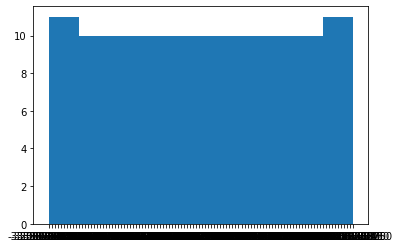

In [28]:
#plot basic statistics of lat data
import matplotlib.pyplot as plt
plt.hist(lat_lst2, bins=10)
lat_lst_ar.mean(),lat_lst_ar.max(),lat_lst_ar.min(),np.median(lat_lst_ar)

In [58]:
#update lat column
df['lat'] = lat_lst_ar
df.iloc[[0,25,50,75,-1]]['lat']

0     -33.062749
25    -32.701023
50    -32.950160
75    -32.998869
101    33.071076
Name: lat, dtype: float64

In [35]:
#looking at lon
df['lon'].unique()

array(['151;51.11618E', '151;45.68100E', '151;47.86027E', '151;52.09848E',
       '151;52.51574E', '152;07.92832E', '152;07.64291E', '152;09.25275E',
       '152;08.24501E', '152;09.6446', '152;09.55696E', '152;09.35569E',
       '152;09.02395E', '152;10.37367E', '152;8.8420E', '152;06.02512E',
       '152;08.37581E', '152;02.28212E', '152;05.07286E', '152;08.28297E',
       '152;07.53275E', '152;07.20587E', '152;06.94053E', ' ',
       '152;06.96611E', '152;04.6852E', '152;6.645E', '141;36.01489E',
       '152;06.36750E', '152;5.863E', '152;5.759E', '152;05.38152E',
       '152;05.38184E', '152;05.27583E', '152;05.1885E', '152;01.90708E',
       '152;01.01059E', '152;01.6654427 E', '152;01.5396830',
       '152;01.76691E', '152;04.37586E', '152;01.3718762 E',
       '151;59.3436680 E', '152;03.01109E', '151;59.3720048 E',
       '140;29.9771032 E', '152;02.33328E', '152;01.78743E',
       '152;01.5690173 E', '151;59.0065833 E', '152;01.45615E',
       '151;58.43397E', '152;00.0428444 

In [41]:
#fixing LON
#Step 1: get a list of proper lon
import numpy as np
##Step 1: calculoning the text to numerical degree numbers
#run once only
lon_lst = []
for idx,lon in enumerate(list(df['lon'].values)):
    lon = lon.strip(' ')
    lon = lon.strip(' ')
    lon = lon.strip('\n')
    lon = lon.strip('E')
    lon = lon.strip('-')
#     if lon == '' or idx==23:
    if lon == '':
        msg = ''
        lon_lst.append(msg)
        print(idx,msg)
    else:
        if lon[3]==';':
            lon = lon.split(';')
            lon_d = lon[0]
            lon_m = lon[1]
            lon_new = float(lon_d)+float(lon_m)/60
            lon_new_f = f'{lon_new:.10f}'
            lon_lst.append(lon_new_f)
            print(idx,lon_new_f)
        else:
            lon = float(lon)
            lon_new_f = f'{lon:.10f}'
            lon_lst.append(lon_new_f)
            print(idx,lon_new_f)
lon_lst

0 151.8519363333
1 151.7613500000
2 151.7976711667
3 151.8683080000
4 151.8752623333
5 152.1321386667
6 152.1273818333
7 152.1542125000
8 152.1374168333
9 152.1607433333
10 152.1592826667
11 152.1559281667
12 152.1503991667
13 152.1728945000
14 152.1473666667
15 152.1004186667
16 152.1395968333
17 152.0380353333
18 152.0845476667
19 152.1380495000
20 152.1255458333
21 152.1200978333
22 152.1156755000
23 
24 152.1161018333
25 152.0780866667
26 152.1107500000
27 141.6002481667
28 152.1061250000
29 152.0977166667
30 152.0959833333
31 152.0896920000
32 152.0896973333
33 152.0879305000
34 152.0864750000
35 152.0317846667
36 152.0168431667
37 152.0277573783
38 152.0256613833
39 152.0294485000
40 152.0729310000
41 152.0228646033
42 151.9890611333
43 152.0501848333
44 151.9895334133
45 140.4996183867
46 152.0388880000
47 152.0297905000
48 152.0261502883
49 151.9834430550
50 152.0242691667
51 151.9738995000
52 152.0007140733
53 152.0059940033
54 151.9985658333
55 151.9572641867
56 151.954799166

['151.8519363333',
 '151.7613500000',
 '151.7976711667',
 '151.8683080000',
 '151.8752623333',
 '152.1321386667',
 '152.1273818333',
 '152.1542125000',
 '152.1374168333',
 '152.1607433333',
 '152.1592826667',
 '152.1559281667',
 '152.1503991667',
 '152.1728945000',
 '152.1473666667',
 '152.1004186667',
 '152.1395968333',
 '152.0380353333',
 '152.0845476667',
 '152.1380495000',
 '152.1255458333',
 '152.1200978333',
 '152.1156755000',
 '',
 '152.1161018333',
 '152.0780866667',
 '152.1107500000',
 '141.6002481667',
 '152.1061250000',
 '152.0977166667',
 '152.0959833333',
 '152.0896920000',
 '152.0896973333',
 '152.0879305000',
 '152.0864750000',
 '152.0317846667',
 '152.0168431667',
 '152.0277573783',
 '152.0256613833',
 '152.0294485000',
 '152.0729310000',
 '152.0228646033',
 '151.9890611333',
 '152.0501848333',
 '151.9895334133',
 '140.4996183867',
 '152.0388880000',
 '152.0297905000',
 '152.0261502883',
 '151.9834430550',
 '152.0242691667',
 '151.9738995000',
 '152.0007140733',
 '152.0

In [45]:
##Step 2: fix missing data and wrong input data
#21: using before and after observations.
lon_lst2 = []
for index, l in enumerate(lon_lst): 
    if l=='' or float(l) < 150 and index!=0 and index!=len(lon_lst) :
        print(index,l)
        l_before = lon_lst[index-1]
        l_before = float(l_before)
        l_after = lon_lst[index+1]
        l_after = float(l_after)
        l = (l_before + l_after)/2
        l = f'{l:.10f}'
        lon_lst2.append(l)
#         print(index,l)
    else:
        lon_lst2.append(l)
#         print(index,l)
for counter,i in enumerate(zip(lon_lst,lon_lst2)): 
    print(counter,i)

23 
27 141.6002481667
45 140.4996183867
0 ('151.8519363333', '151.8519363333')
1 ('151.7613500000', '151.7613500000')
2 ('151.7976711667', '151.7976711667')
3 ('151.8683080000', '151.8683080000')
4 ('151.8752623333', '151.8752623333')
5 ('152.1321386667', '152.1321386667')
6 ('152.1273818333', '152.1273818333')
7 ('152.1542125000', '152.1542125000')
8 ('152.1374168333', '152.1374168333')
9 ('152.1607433333', '152.1607433333')
10 ('152.1592826667', '152.1592826667')
11 ('152.1559281667', '152.1559281667')
12 ('152.1503991667', '152.1503991667')
13 ('152.1728945000', '152.1728945000')
14 ('152.1473666667', '152.1473666667')
15 ('152.1004186667', '152.1004186667')
16 ('152.1395968333', '152.1395968333')
17 ('152.0380353333', '152.0380353333')
18 ('152.0845476667', '152.0845476667')
19 ('152.1380495000', '152.1380495000')
20 ('152.1255458333', '152.1255458333')
21 ('152.1200978333', '152.1200978333')
22 ('152.1156755000', '152.1156755000')
23 ('', '152.1158886666')
24 ('152.1161018333', '1

In [59]:
#visual check of lon data
#generate a numpy array
lon_lst_ar = np.array([float(i) for i in lon_lst2])
lon_lst_ar

array([151.85193633, 151.76135   , 151.79767117, 151.868308  ,
       151.87526233, 152.13213867, 152.12738183, 152.1542125 ,
       152.13741683, 152.16074333, 152.15928267, 152.15592817,
       152.15039917, 152.1728945 , 152.14736667, 152.10041867,
       152.13959683, 152.03803533, 152.08454767, 152.1380495 ,
       152.12554583, 152.12009783, 152.1156755 , 152.11588867,
       152.11610183, 152.07808667, 152.11075   , 152.1084375 ,
       152.106125  , 152.09771667, 152.09598333, 152.089692  ,
       152.08969733, 152.0879305 , 152.086475  , 152.03178467,
       152.01684317, 152.02775738, 152.02566138, 152.0294485 ,
       152.072931  , 152.0228646 , 151.98906113, 152.05018483,
       151.98953341, 152.01421071, 152.038888  , 152.0297905 ,
       152.02615029, 151.98344306, 152.02426917, 151.9738995 ,
       152.00071407, 152.005994  , 151.99856583, 151.95726419,
       151.95479917, 151.87553033, 151.94766555, 151.954067  ,
       151.97112467, 151.97261615, 151.96703967, 151.95

(152.0006898471039, 152.1728945, 151.76135, 152.00335403830002)

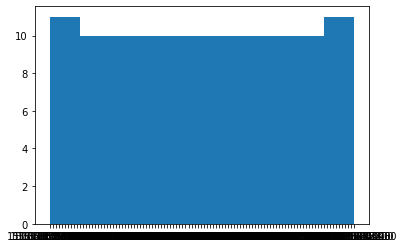

In [48]:
#plot basic statistics of lon data
import matplotlib.pyplot as plt
plt.hist(lon_lst2, bins=10)
lon_lst_ar.mean(),lon_lst_ar.max(),lon_lst_ar.min(),np.median(lon_lst_ar)

In [60]:
#update lon column
df['lon'] = lon_lst_ar
df.iloc[[0,25,50,75,-1]]['lon']

0      151.851936
25     152.078087
50     152.024269
75     151.926141
101    151.867140
Name: lon, dtype: float64

In [50]:
%whos

Variable        Type         Data/Info
--------------------------------------
counter         int          101
df              DataFrame         oid_   index        <...>\n[102 rows x 15 columns]
file_n          str          20210112_1830_SVP
i               tuple        n=2
idx             int          101
in_csv          str          E:\HIPP\11_Deliverables\0<...>VP_Raw\SI1001_SVP_RAW.csv
index           int          101
l               str          151.8671403960
l_after         float        152.038888
l_before        float        151.9895334133
lat             float        33.071076275
lat_d           str          32
lat_lst         list         n=102
lat_lst2        list         n=102
lat_lst_ar      ndarray      102: 102 elems, type `float64`, 816 bytes
lat_m           str          57.88093
lat_new         float        -32.96468216666667
lat_new_f       str          33.0710762750
lon             float        151.867140396
lon_d           str          151
lon_lst         list     

In [61]:
#check the who data frame
df.iloc[[0,50,100,-1]]

,oid_,index,date,utc,svp_file,svp_url,svp_source,e_utm56s,n_utm56s,zone,lat,lon,depth,comment,enter_prof
0,0,SVP002,9/12/2020 0:00:00,06:04,20201209_0555_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,392825.73,6341170.80,56S,-33.062749,151.851936,127,Use Valeport to export .asvp,ES
50,50,SVP052,24/12/2020 0:00:00,14:13,20201224_1400_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,408798.26,6353815.91,56S,-32.950160,152.024269,112,Block 02,NS
100,100,SVP102,12/01/2021 0:00:00,04:00,20210112_0400_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,385687.05,6348396.33,56S,32.996860,151.776382,35,Block 01,BT
101,101,SVP103,12/01/2021 0:00:00,18:23,20210112_1830_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,394255.10,6340262.99,56S,33.071076,151.867140,108,Block 01,NS


#### Add sample number column

In [229]:
#add new column named sample_number
df['sample_num'] = [i[3:] for i in list(sdf['index'].unique())]
df.iloc[[0,50,100,-1]]

,oid_,index,date,utc,svp_file,svp_url,svp_source,e_utm56s,n_utm56s,zone,lat,lon,depth,comment,enter_prof,SHAPE,sample_num
0,0,SVP002,9/12/2020 0:00:00,06:04,20201209_0555_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,392825.73,6341170.80,56S,-33.062749,151.851936,127,Use Valeport to export .asvp,ES,"{""spatialReference"": {""wkid"": 32756}, ""x"": 392...",002
50,50,SVP052,24/12/2020 0:00:00,14:13,20201224_1400_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,408798.26,6353815.91,56S,-32.950160,152.024269,112,Block 02,NS,"{""spatialReference"": {""wkid"": 32756}, ""x"": 408...",052
100,100,SVP102,12/01/2021 0:00:00,04:00,20210112_0400_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,385687.05,6348396.33,56S,32.996860,151.776382,35,Block 01,BT,"{""spatialReference"": {""wkid"": 32756}, ""x"": 385...",102
101,101,SVP103,12/01/2021 0:00:00,18:23,20210112_1830_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,394255.10,6340262.99,56S,33.071076,151.867140,108,Block 01,NS,"{""spatialReference"": {""wkid"": 32756}, ""x"": 394...",103


#### Calculate coordinates for 2 two cols in UTM56S: already available

In [12]:
df.describe()

,oid_,e_utm56s,n_utm56s,depth
count,102.000000,102.000000,1.020000e+02,102.000000
mean,50.500000,406464.019314,6.356211e+06,88.696078
std,29.588849,9439.136997,8.629002e+03,29.297987
min,0.000000,384270.690000,6.340263e+06,0.000000
25%,25.250000,398242.377500,6.350147e+06,75.250000
50%,50.500000,406847.360000,6.356022e+06,105.000000
75%,75.750000,414830.622500,6.361975e+06,110.000000
max,101.000000,422609.300000,6.381481e+06,127.000000


#### Play with data - understand data

In [ ]:
df.depth.agg(['mean','max','min'])

In [ ]:
df.groupby('date_utc').depth.agg(['mean','min','max','median'])

In [ ]:
df.groupby('class').depth.agg(['mean','min','max','median'])

In [ ]:
df.groupby(['class','date_utc']).depth.agg(['mean','median','min','max'])

In [ ]:
df.groupby(['date_utc','class']).depth.agg(['mean','median','min','max'])

#### 1c Simple Visual check - Pandas

<AxesSubplot:xlabel='lon', ylabel='lat'>

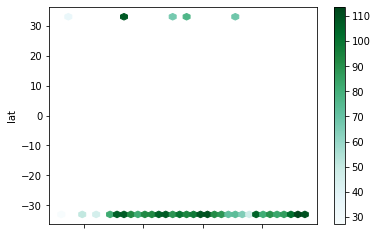

In [67]:
#visual check using lon/lat: bad
df.plot.hexbin(x='lon',y='lat',C='depth',gridsize=35)

<AxesSubplot:xlabel='e_utm56s', ylabel='n_utm56s'>

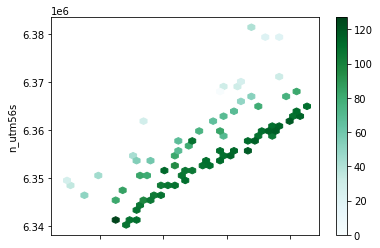

In [68]:
#visual check using x,y: good
df.plot.hexbin(x='e_utm56s',y='n_utm56s',C='depth',gridsize=35)

count    102.000000
mean      88.696078
std       29.297987
min        0.000000
25%       75.250000
50%      105.000000
75%      110.000000
max      127.000000
Name: depth, dtype: float64
(101.6, 114.3]    46
(76.2, 88.9]      16
(114.3, 127.0]    10
(63.5, 76.2]       8
(25.4, 38.1]       7
(50.8, 63.5]       5
(38.1, 50.8]       4
(88.9, 101.6]      3
(12.7, 25.4]       2
(-0.128, 12.7]     1
Name: depth, dtype: int64


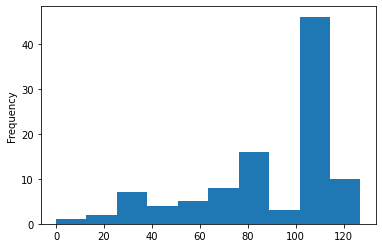

In [71]:
#Depth histogram
print(df['depth'].describe())
depth_bin10 = df['depth'].value_counts(bins=10)
print(depth_bin10)
df['depth'].plot.hist(bins=10);

In [74]:
df.describe()

,oid_,e_utm56s,n_utm56s,lat,lon,depth
count,102.000000,102.000000,1.020000e+02,102.000000,102.000000,102.000000
mean,50.500000,406464.019314,6.356211e+06,-29.053663,152.000690,88.696078
std,29.588849,9439.136997,8.629002e+03,15.574446,0.102032,29.297987
min,0.000000,384270.690000,6.340263e+06,-33.070659,151.761350,0.000000
25%,25.250000,398242.377500,6.350147e+06,-32.980562,151.910534,75.250000
50%,50.500000,406847.360000,6.356022e+06,-32.918991,152.003354,105.000000
75%,75.750000,414830.622500,6.361975e+06,-32.872836,152.089696,110.000000
max,101.000000,422609.300000,6.381481e+06,33.071076,152.172895,127.000000


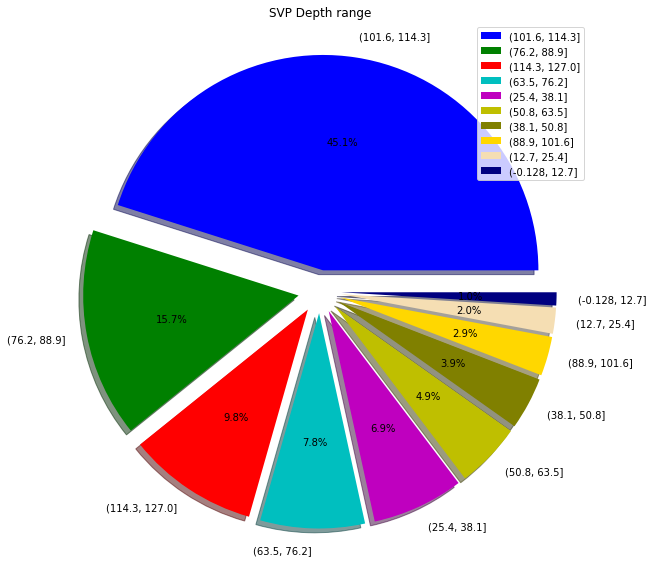

In [78]:
#depth distribution
import numpy as np
import matplotlib.pyplot as plt
#pile chart of sediment type distribution
fig, ax1 = plt.subplots(figsize = (10,8)) 
colors = ['b','g','r','c','m','y','olive','gold','wheat','navy'] #we know that there are 4 types
labels = list(depth_bin10.index)
values_fraction = np.round(depth_bin10.values*100/150,2)
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
ax1.pie(values_fraction,colors=colors,labels=labels,explode=explode,
        autopct='%1.1f%%',counterclock=True,shadow=True)
plt.title('SVP Depth range')
ax1.legend(labels, loc = 0) 
plt.tight_layout() 
plt.show()


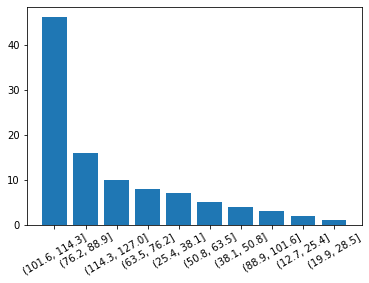

In [79]:

labels_str = [str(i) for i in labels]
labels_str[-1] = '(19.9, 28.5]'
plt.bar(labels_str,depth_bin10.values)
plt.xticks(rotation=30)
plt.show()

#### 1d Convert to spatially enable dataframe - spatial pandas
20210226_Not working when exporting to shp file


In [83]:
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [237]:
#drop col SHAPE before convert to spatial data frame

In [242]:
# help(df.drop)
# df = df.drop(columns=['SHAPE'])
df.columns

Index(['oid_', 'index', 'date', 'utc', 'svp_file', 'svp_url', 'svp_source',
       'e_utm56s', 'n_utm56s', 'zone', 'lat', 'lon', 'depth', 'comment',
       'enter_prof', 'sample_num'],
      dtype='object')

In [253]:
sdf = pd.DataFrame.spatial.from_xy(df=df,
                                    x_column='e_utm56s',
                                    y_column='n_utm56s',
                                    sr=32756)
#                                     sr=4326)
sdf.iloc[[0,50,100,-1]]

,oid_,index,date,utc,svp_file,svp_url,svp_source,e_utm56s,n_utm56s,zone,lat,lon,depth,comment,enter_prof,sample_num,SHAPE
0,0,SVP002,9/12/2020 0:00:00,06:04,20201209_0555_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,392825.73,6341170.80,56S,-33.062749,151.851936,127,Use Valeport to export .asvp,ES,002,"{""spatialReference"": {""wkid"": 32756}, ""x"": 392..."
50,50,SVP052,24/12/2020 0:00:00,14:13,20201224_1400_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,408798.26,6353815.91,56S,-32.950160,152.024269,112,Block 02,NS,052,"{""spatialReference"": {""wkid"": 32756}, ""x"": 408..."
100,100,SVP102,12/01/2021 0:00:00,04:00,20210112_0400_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,385687.05,6348396.33,56S,32.996860,151.776382,35,Block 01,BT,102,"{""spatialReference"": {""wkid"": 32756}, ""x"": 385..."
101,101,SVP103,12/01/2021 0:00:00,18:23,20210112_1830_SVP,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,MiniSVP SN67443,394255.10,6340262.99,56S,33.071076,151.867140,108,Block 01,NS,103,"{""spatialReference"": {""wkid"": 32756}, ""x"": 394..."


In [254]:
sdf_iloc = sdf.iloc[[0,len(sdf)/5,len(sdf)*2.5/5,len(sdf)*4/5,-1]]
sdf_iloc[['comment', 'index', 'svp_file', 'date','svp_url','sample_num', 'svp_source','e_utm56s','n_utm56s']]

,comment,index,svp_file,date,svp_url,sample_num,svp_source,e_utm56s,n_utm56s
0,Use Valeport to export .asvp,SVP002,20201209_0555_SVP,9/12/2020 0:00:00,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,002,MiniSVP SN67443,392825.73,6341170.80
20,Use Valeport to export .asvp,SVP022,20201217_0002_SVP,17/12/2020 0:00:00,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,022,MiniSVP SN67464,418206.84,6360902.18
51,Block 02,SVP053,20201225_0001_SVP,25/12/2020 0:00:00,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,053,MiniSVP SN67443,404057.46,6357113.19
81,Block 01,SVP083,20210101_2300_SVP,1/01/2021 0:00:00,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,083,MiniSVP SN67443,396070.76,6343717.84
101,Block 01,SVP103,20210112_1830_SVP,12/01/2021 0:00:00,11_FinalDeliverables\03_Bathymetry\05_SoundVel...,103,MiniSVP SN67443,394255.10,6340262.99


##### Project from WGS84 to UTM56S: already in UTM56S

In [95]:
sdf.SHAPE.head()

0    {"spatialReference": {"wkid": 32756}, "x": 392...
1    {"spatialReference": {"wkid": 32756}, "x": 384...
2    {"spatialReference": {"wkid": 32756}, "x": 387...
3    {"spatialReference": {"wkid": 32756}, "x": 394...
4    {"spatialReference": {"wkid": 32756}, "x": 394...
Name: SHAPE, dtype: geometry

In [96]:
sdf.spatial.sr

{'wkid': 32756}

In [97]:
sdf.spatial.full_extent

(384270.69, 6340262.99, 422609.3, 6381481.23)

#### 1e visual check with spatial df

In [255]:
# sdf.spatial.plot()
sdf.spatial.plot(col='depth',renderer_type = 'c',class_count=5)

MapView(layout=Layout(height='400px', width='100%'))

In [198]:
from arcgis.mapping import show_styles, display_colormaps
from arcgis.gis import GIS

gis = GIS(profile='your_online_profile',verify_cert=False)
m_class = GIS().map(zoomlevel=9.525)
m_class.center=[sdf.lat.mean()-3.85,sdf.lon.mean()+0.2]
m_class.legend = True
m_class


Profile your_online_profile does not have a password on file through keyring. If you are expecting this behavior (PKI or IWA authentication, entering password through run-time prompt, etc.), please ignore this message. If you would like to store your password in the your_online_profile profile, run GIS(profile = 'your_online_profile', password = ...). See the API doc for more details. (http://bit.ly/2CK2wG8)


MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [200]:
sdf.spatial.plot(map_widget=m_class,
                 col='depth',
                 renderer_type = 'c',
                 class_count=5,
                 symbol_style='d',
                 marker_size=10,
                 symbol_type='simple'
                )

True

#### 1e export 2 shp file - not work

In [ ]:
out_shp = r'E:\HIPP\11_Deliverables\03_Bathymetry\08_SeabedTexture_And_AncillaryLayers\SI1001SamplesUTM56Ssdf2shp.shp'
sdf.spatial.to_featureclass(out_shp)

In [ ]:
os.listdir('E:\\HIPP\\11_Deliverables\\03_Bathymetry\\08_SeabedTexture_And_AncillaryLayers')

In [ ]:
#read in again to check
sdf2 = pd.DataFrame.spatial.from_featureclass(out_shp)
sdf2.iloc[[0,50,100,-1]]

In [ ]:
m2 = GIS().map(zoomlevel=10.5)
m2.center=[sdf2.lat.mean(),sdf.lon.mean()]
m2.legend = True
m2

In [ ]:
sdf2.spatial.plot(map_widget=m2,
                 col='class',
                 renderer_type = 'u',
                 symbol_style='d',
                 marker_size=10,
                 symbol_type='simple'
                )

#### Export to csv - using normal pandas

In [256]:
#use pandas with no index
out_csv=r'E:\HIPP\11_Deliverables\03_Bathymetry\05_SoundVelocityProfiles\SVP_Raw\SI1001_SVP_UTM56S_SSDM.csv'
sdf.to_csv(out_csv,index=False)
sdf_iloc = sdf.iloc[[0,len(sdf)/5,len(sdf)*2.5/5,len(sdf)*4/5,-1]]
# sdf_iloc
sdf_iloc[['index', 'date', 'depth', 'svp_file','e_utm56s','n_utm56s', 'svp_source','comment','enter_prof']]

,index,date,depth,svp_file,e_utm56s,n_utm56s,svp_source,comment,enter_prof
0,SVP002,9/12/2020 0:00:00,127,20201209_0555_SVP,392825.73,6341170.80,MiniSVP SN67443,Use Valeport to export .asvp,ES
20,SVP022,17/12/2020 0:00:00,115,20201217_0002_SVP,418206.84,6360902.18,MiniSVP SN67464,Use Valeport to export .asvp,NS
51,SVP053,25/12/2020 0:00:00,85,20201225_0001_SVP,404057.46,6357113.19,MiniSVP SN67443,Block 02,NS
81,SVP083,1/01/2021 0:00:00,108,20210101_2300_SVP,396070.76,6343717.84,MiniSVP SN67443,Block 01,NS
101,SVP103,12/01/2021 0:00:00,108,20210112_1830_SVP,394255.10,6340262.99,MiniSVP SN67443,Block 01,NS


### Step 2: using XYTableToPoint to convert csv file into ESRI shp format

#### 2.1 Convert E,N coordinate data to shp file using arcpy.management.XYTableToPoint (csv2shp)

In [3]:
import arcpy
arcpy.env.overwriteOutput = True
#csv2shp_UTM56S
arcpy.env.workspace = r"E:\HIPP\11_Deliverables\03_Bathymetry\05_SoundVelocityProfiles\SVP_Raw"
out_csv=r'E:\HIPP\11_Deliverables\03_Bathymetry\05_SoundVelocityProfiles\SVP_Raw\SI1001_SVP_UTM56S_SSDM.csv'
in_table = out_csv
out_feature_class = "SI1001_SVP_UTM56S_SSDM.shp"
x_coords = "e_utm56s"
y_coords = "n_utm56s"
z_coords = None
sr = arcpy.SpatialReference(32756) #CRS: UTM56S 32756
try: arcpy.management.XYTableToPoint(in_table, out_feature_class,
                                x_coords, y_coords, z_coords,
                                sr)
except Exception as e: print(e)

# Print the total rows
print(arcpy.GetCount_management(out_feature_class))

102


#### 2.2 Check results using quick visualisation

In [4]:
#readin using sdf to test the table and geometry
import pandas as pd
from arcgis.mapping import show_styles, display_colormaps
from arcgis.gis import GIS

arcpy.env.workspace = r"E:\HIPP\11_Deliverables\03_Bathymetry\05_SoundVelocityProfiles\SVP_Raw"
sdf_test = pd.DataFrame.spatial.from_featureclass(out_feature_class)
# sdf_test.spatial.plot()
sdf_test.spatial.plot(col='depth',renderer_type = 'c',class_count=5)

MapView(layout=Layout(height='400px', width='100%'))

In [216]:
#bit more detailed visualisation
from arcgis.mapping import show_styles, display_colormaps
from arcgis.gis import GIS

gis = GIS(profile='your_online_profile',verify_cert=False)
m_class = GIS().map(zoomlevel=9.525)
m_class.center=[sdf_test.lat.mean()-3.85,sdf_test.lon.mean()+0.2]
m_class.legend = True
m_class

Profile your_online_profile does not have a password on file through keyring. If you are expecting this behavior (PKI or IWA authentication, entering password through run-time prompt, etc.), please ignore this message. If you would like to store your password in the your_online_profile profile, run GIS(profile = 'your_online_profile', password = ...). See the API doc for more details. (http://bit.ly/2CK2wG8)


MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [217]:
sdf_test.spatial.plot(map_widget=m_class,
                 col='depth',
                 renderer_type = 'c',
                 class_count=5,
                 symbol_style='d',
                 marker_size=10,
                 symbol_type='simple'
                )

True

#### Convert from csv to shp file using WGS84 coordinate information

#### This operation required open with notebook in arcgis pro
#edit wrong points using arcgis pro then export dbf to new csv file. then reimport csv file to shp file.

### Step 3: Define field name and attribute values and use CalculateField to update field values
#this operation used after the data is populated (load) into SSDM database

In [54]:
#testing readin again and display the data from SSDM geodatabase using spatial enable dataframe